# Loading  libraries

In [108]:
import numpy as np
import array
import matplotlib.pyplot as plt
from scipy import signal
import scipy.integrate as integrate
from matplotlib import colors as mcolors

from __future__ import division
colors = ["black","cyan","darkmagenta","orange","red","blue","darkred","khaki","brown","pink"]


In [109]:
from collections import defaultdict

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
t_b = nested_dict(5, list)
data = nested_dict(5, list)


# Making the initial conditions

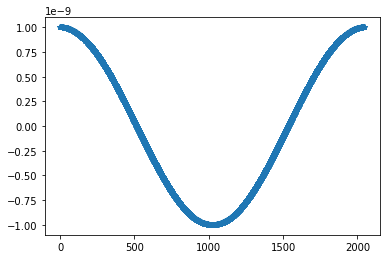

('Should be 0 for the symmetric case: ', 4.7061904237132006e-15)
('The second derivative at minimum is:', 9.4123808474264012e-15)
('The second analytical derivative at minimum is:', 3.764955292163604e-05)
('Minimum point is:', -1.0000000000000001e-09, 'which is at', 1024)


In [16]:
n_grid = 2**11# size of data array, number of points for the IC in 1D
# phi0 = 1.e-4
# myseed = 444
# binfac = 4**5
# f5=open('./real_pi.txt', 'w')
# np.random.seed(seed=myseed)
# Ma
phism=np.zeros(n_grid) # phism is going to be phi in comsology and is made either as a random noise or a given function for the study
# sigma=np.sqrt(sigmax2)
# for i in range( int((n_grid)/2)+1 ):
# #     if i<=(nx-1)/2:
#     phism[i]=1.0*np.cos(np.pi*4.0*i/n_grid) # taking phi initially as cosine function for half od the data
# #     phism[i]=((i-(n_grid/2))/n_grid)**2  # taking phi initially as cosine function for half od the data
#     phism[n_grid-1-i]=phism[i] # the other half are made in a way that to make the data symmetric.
       
for i in range( n_grid ):
#     if i<=(nx-1)/2:
    phism[i]=1.e-9*np.cos(np.pi*2.0*i/n_grid) # taking phi initially as cosine function for half od the data
#     phism[i]=((i-(n_grid/2))/n_grid)**2  # taking phi initially as cosine function for half od the data
#     phism[n_grid-1-i]=phism[i] # the other half are made in a way that to make the data symmetric.
        
# np.savetxt("real_phi.txt",phism)
# spec = np.abs(np.fft.fft(phism))**2 # computing the spectrum which is absolute value of Forier transformation
# freqs = np.fft.fftfreq(len(phism)) # discrete frequencies associated to the length of the field

# pi  = phism # In case we want to set at the initial time pi = phi otherwise it is set by the PDE, like in the 3D case. 
# phism = 1.e-5 * (phism);
plt.plot(phism,"*")
plt.show()
#Making sure that the made data is symmetric
for i in range(n_grid):
    ss=+phism[n_grid-i-1]-phism[i]
print("Should be 0 for the symmetric case: ", ss) # Has to be 0 otherwise the data is not symmetric
phism[0]
dx=1
print("The second derivative at minimum is:",np.max((np.roll(phism,1)+np.roll(phism,-1)-2.0*phism)/dx**2))
print("The second analytical derivative at minimum is:",np.pi**2*16/(n_grid**2))

print("Minimum point is:",np.min(phism), "which is at",np.argmin(phism))



In [141]:
###########################
##### Initial conditions:##
###########################
w = -0.9;
cs2 = 0.;
z_ini = 200000.;
N_ini = np.log(1./(1. + z_ini)); # N = log (a) so N = 
count_print =15
z_end = 10.;
N_end = np.log(1./(1. + z_end))
H0=0.0691023
Omega_m = 3./10.
w = -0.9;
###########################
##### Functions ##
###########################
def H2(H0, Omega_m, w , N_par):
    return H0**2 * (Omega_m * np.exp(-N_par) + (1. - Omega_m) * np.exp(-(1. + 3.*w) * N_par));


###########################
##### simulation 1+1 D##
###########################
courant_factor = 10.95e3
number_loop = 12
for dx_num in range(1,number_loop,1):
    if (dx_num ==0):
        dx_num=1;
    
    # Initial condition
    print(dx_num)
    pi   = np.zeros(n_grid)
    pi_prime = np.zeros(n_grid)
    #IC
    # del cs2;
    # pi_prime  = phism This is indeed the IC but the PDE itself assign it.
    pi_prime = phism;
    ########################
    dx =4.e-3*np.pi/n_grid/(2.**dx_num);
    dN = courant_factor * dx;
    print("dN: ",dN)
    pi_prime_p  = np.roll(phism,1)
    pi_prime_2p  = np.roll(phism,2)
    pi_prime_m  = np.roll(phism,-1)
    pi_prime_2m  = np.roll(phism,-2)
    laplacepi_prime_ini =  ((-pi_prime_2p + 16*pi_prime_p -30.0*pi_prime + 16*pi_prime_m-pi_prime_2m)/(12.0*dx**2));
#     laplacepi_prime_ini = ((pi_prime_p+pi_prime_m-2.0*pi_prime)/dx**2);
    laplacepi = 1.;
    laplacepi_new =0.1
    numerator = 0;
    ratio = 1.;
    condition_number = 1.e20
    print_numerator=0
#     t_b = 2.02225* (1./(laplacepi_prime_ini[np.argmin(phism)]/2.))**(1./3.)
#     print("Expected t_b:", t_b)
    N_param =N_ini;
    while  (ratio< condition_number and N_param<N_end):
    ########################
        pi_p  = np.roll(pi,1)
        pi_2p  = np.roll(pi,2)
        pi_m = np.roll(pi,-1)
        pi_2m = np.roll(pi,-2)
        ######3##
        pi_prime_p  = np.roll(pi_prime,1)
        pi_prime_m  = np.roll(pi_prime,-1)
        pi_prime_2p  = np.roll(pi_prime,2)
        pi_prime_2m  = np.roll(pi_prime,-2)
        ######################
        # pi' = v_pi ---> pi (t+dt) = pi(t) + v_pi *dt
        # The second eq is v_pi (t+dt) = v_pi(t) + v_pi' * dt
        # v_pi' = c_s^2 nabla^2 pi + (grad pi) ^2
#         laplacepi = ((pi_p+pi_m-2.0*pi)/dx**2);
        laplacepi = ((-pi_2p + 16*pi_p -30.0*pi + 16*pi_m-pi_2m)/(12.0*dx**2));
        laplacepi_prime = ((-pi_prime_2p + 16*pi_prime_p -30.0*pi_prime + 16*pi_prime_m-pi_prime_2m)/(12.0*dx**2));     
        gradpi_squared = ((pi_p-pi_m)/(2.0*dx))**2;
#         pi_prime_prime = cs2 * laplacepi  + 1./(H2(H0, Omega_m, w , N_param)) * gradpi_squared #+our_term  #NL_term4 #gradpi_squared + ((cs2 -1)/2.) * grad_gradpi_gradpi_squared #gradpi_squared#+ 10. * ((cs2 -1)/2.) * grad_gradpi_gradpi_squared;# zeta' is pi_v'
        pi_prime_prime = cs2 * laplacepi  + 1./(1.0) * gradpi_squared #+our_term  #NL_term4 #gradpi_squared + ((cs2 -1)/2.) * grad_gradpi_gradpi_squared #gradpi_squared#+ 10. * ((cs2 -1)/2.) * grad_gradpi_gradpi_squared;# zeta' is pi_v'

        pi_old = pi;
        pi_prime = pi_prime + dN*(pi_prime_prime); # pi_v
        pi  = pi+dN*(pi_prime) # pi
        ###########################
        pi_p  = np.roll(pi,1)
        pi_2p  = np.roll(pi,2)
        pi_m = np.roll(pi,-1)
        pi_2m = np.roll(pi,-2)
        
        if (N_param == N_ini):
            ratio = 1;
        else:
            ratio = pi[np.argmin(phism)]/pi_old[np.argmin(phism)];# condition tos top the loop
        if (print_numerator%count_print==0 or N_param == N_ini):
            data[dx_num]['z'][numerator] =  np.exp(-N_param)-1.;
            data[dx_num]['pi'][numerator] = pi
            data[dx_num]['pi_prime'][numerator] = pi_prime
            data[dx_num]['curvature'][numerator] = laplacepi
            data[dx_num]['pi_prime_curvature'][numerator] = laplacepi_prime

            numerator = numerator+1;
        data[dx_num]['dx'] = dx;
        data['Laplace_phi_ini'][dx_num] = laplacepi_prime_ini;
        print_numerator=print_numerator+1;
        data[dx_num]['numerator'] = numerator;
        data['N_b'][dx_num] = N_param;
        data['z_b'][dx_num] = np.exp(-N_param)-1.;
        data['a_b'][dx_num] = np.exp(N_param);
#         data['taub_theory'][dx_num] = t_b;
        N_param = N_param + dN
    print("Number of data:",numerator)
    print('The run for condition:'+ str("{:.1e}".format(condition_number))+', Ngrid= '+ str(n_grid) +', dx= '+str(dx)+' , dN= '+str(dN)+', Finished in N: '+str(N_param)+" ,which is z:"+str(np.exp(-N_param)-1.))



1
('dN: ', 0.033594179254695544)
('Number of data:', 20)
The run for condition:1.0e+20, Ngrid= 2048, dx= 3.06796157577e-06 , dN= 0.0335941792547, Finished in N: -2.39657730315 ,which is z:9.98551188338
2
('dN: ', 0.016797089627347772)
('Number of data:', 39)
The run for condition:1.0e+20, Ngrid= 2048, dx= 1.53398078789e-06 , dN= 0.0167970896273, Finished in N: -2.39657730315 ,which is z:9.98551188338
3
('dN: ', 0.008398544813673886)


/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in true_divide
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: overflow encountered in true_divide
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: overflow encountered in square
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in multiply
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in add
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in subtract
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in add
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: inv

('Number of data:', 78)
The run for condition:1.0e+20, Ngrid= 2048, dx= 7.66990393943e-07 , dN= 0.00839854481367, Finished in N: -2.48056275128 ,which is z:10.9479862709
4
('dN: ', 0.004199272406836943)
('Number of data:', 95)
The run for condition:1.0e+20, Ngrid= 2048, dx= 3.83495196971e-07 , dN= 0.00419927240684, Finished in N: -6.22211446578 ,which is z:502.767305376
5
('dN: ', 0.0020996362034184715)
('Number of data:', 118)
The run for condition:1.0e+20, Ngrid= 2048, dx= 1.91747598486e-07 , dN= 0.00209963620342, Finished in N: -8.49392083787 ,which is z:4883.98179558
6
('dN: ', 0.0010498181017092358)
('Number of data:', 146)
The run for condition:1.0e+20, Ngrid= 2048, dx= 9.58737992429e-08 , dN= 0.00104981810171, Finished in N: -9.91432472949 ,which is z:20216.9222371
7
('dN: ', 0.0005249090508546179)
('Number of data:', 181)
The run for condition:1.0e+20, Ngrid= 2048, dx= 4.79368996214e-08 , dN= 0.000524909050855, Finished in N: -10.7851488449 ,which is z:48297.1648867
8
('dN: ', 

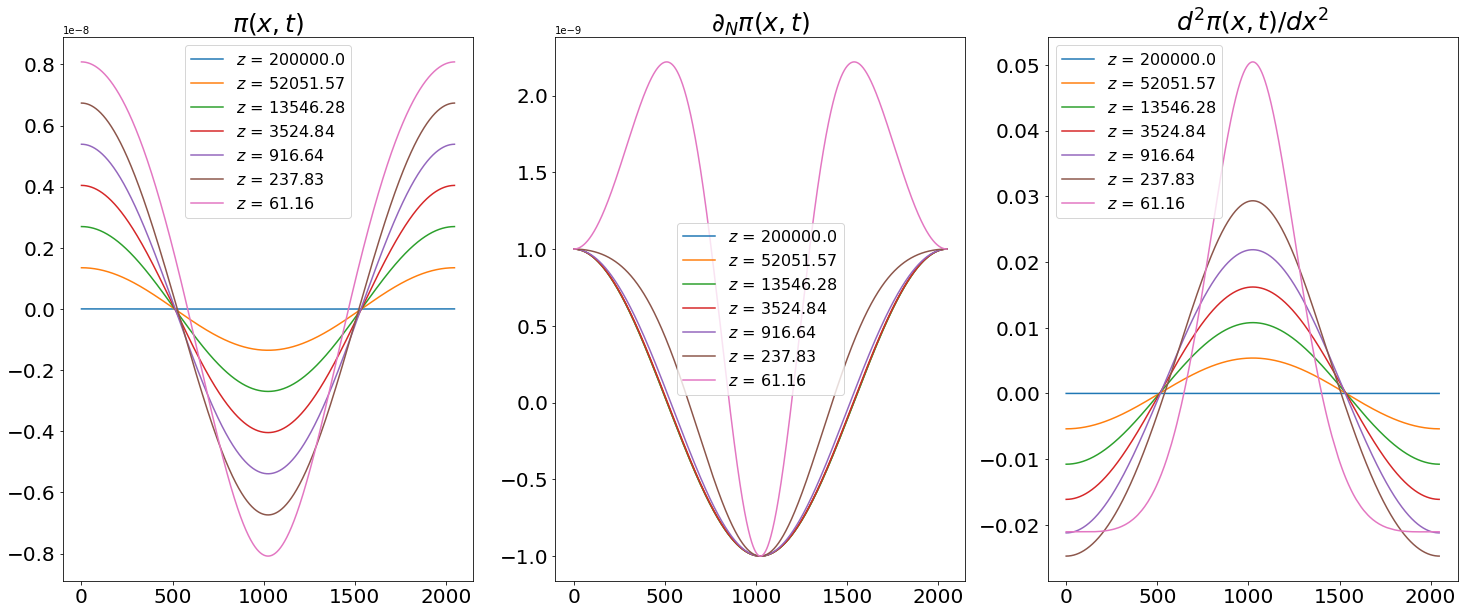

In [123]:
# %matplotlib notebook
# from matplotlib import animation
# import matplotlib.animation

x=np.arange(0,n_grid,1)
fig = plt.figure(figsize=(25,10))
ims  = []

l=0
dx_num = 2
for i in range(0, data[dx_num]['numerator']-30,30):
# for i in [0,int(numbers/tauwrite+1),int(numbers/tauwrite+1)*2,numbers-1]:

    plt.subplot(1,3,1)
    im1, = plt.plot(data[dx_num]['pi'][i] ,"-",markersize=16,label=r"$z$ = "+str(np.round(data[dx_num]['z'][i] ,2)))

    plt.tick_params(labelsize=20)
    plt.title("$\pi(x,t)$",fontsize=25)
#     plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
    plt.legend(fontsize=16)
    plt.subplot(1,3,2)
    im2, =plt.plot(data[dx_num]['pi_prime'][i],"-",markersize=16,label=r"$z$ = "+str(np.round(data[dx_num]['z'][i],2)))
#     im2, =plt.plot(list_pi_prime[i][:],"-",markersize=16)
    plt.legend(fontsize=16)

    plt.tick_params(labelsize=20)
    plt.title(r"$\partial_{N}\pi(x,t)$",fontsize=25)
    #########
    plt.subplot(1,3,3)

    im1, = plt.plot(data[dx_num]['curvature'][i] ,"-",markersize=16,label=r"$z$ = "+str(np.round(data[dx_num]['z'][i] ,2)))

    plt.tick_params(labelsize=20)
    plt.title("$d^2\pi(x,t)/dx^2$",fontsize=25)
#     plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
    plt.legend(fontsize=16)
    plt.legend(fontsize=16)
    l=l+1;
# plt.savefig('time_derivatives.pdf')
plt.show()
# ani.save('fields_1DBlowup.mp4',dpi=400)

# dx (resolution) vs Blowup time

## Fitting

In [145]:

num = number_loop
# num=4
fit_data = np.zeros((num-1,2));

for dx_num in range(1,num,1):
    point = np.argmin(phism)
    dx = data[dx_num]['dx'];
    k0 = data['Laplace_phi_ini'][dx_num][point]#  curvature
    blowup_z =data['z_b'][dx_num]
    fit_data[dx_num-1,0] =  blowup_z + 1 
    fit_data[dx_num-1,1] =dx

from scipy.optimize import curve_fit;
def func (x, alpha, beta):
    return x * alpha + beta

skip_ini = 0
skip_fin =0
x = np.log(fit_data[skip_ini:,0])
y = np.log(fit_data[skip_ini:,1])
initial_values = [1,1]

best_vals, covar = curve_fit(func, x, y, p0 = initial_values);

print(best_vals)




[ -0.53585    -11.79605642]


('PDE: ', defaultdict(<function <lambda> at 0x7fc3c8175938>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3c81759b0>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3c8175b18>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3c8175c08>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3c8175cf8>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3c8175de8>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3c8175ed8>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc29ae036e0>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc29ae035f0>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc29ae032a8>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc29ae03320>, {}))


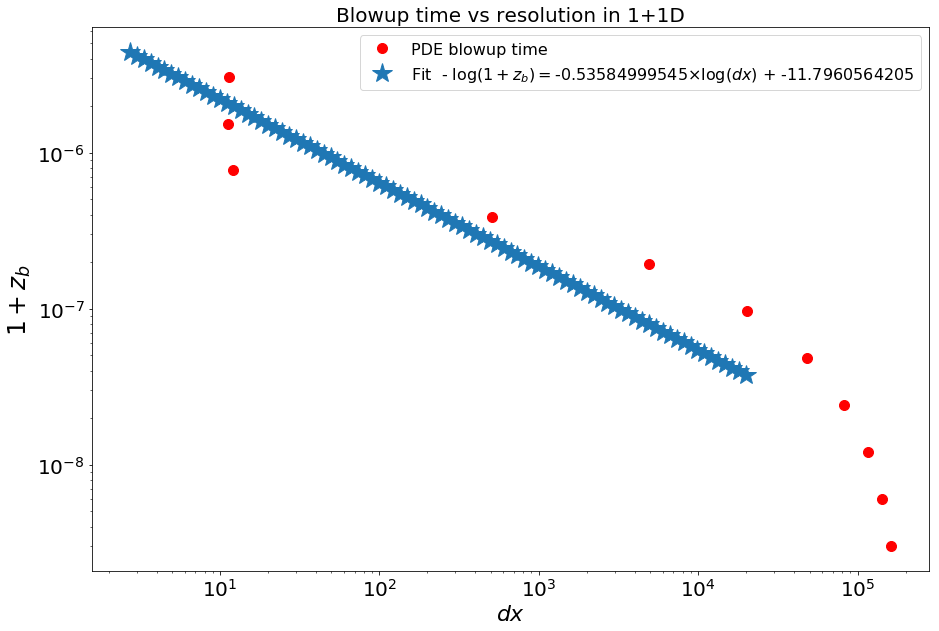

In [148]:
fig = plt.figure(figsize=(15,10))
plt.tick_params(labelsize=22)

# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt

# def model_peter(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt =4.0* a**2 ;
#     dzdt = [dadt,dvdt]
#     return dzdt

l=0

for dx_num in range(1,number_loop,1):
    # initial condition
    point = np.argmin(phism)

    numerator=0
    dx = data[dx_num]['dx']
    k0 = data['Laplace_phi_ini'][dx_num][point]#  curvature
    z0 = [0.000000,k0/2.]
    # time points
        # time points
#     blowup_time =data['taub_theory'][dx_num]
#     t = np.linspace(0,blowup_time,100)
    # t2 = np.linspace(0,0.6)
#     z_peter = odeint(model_peter,z0,t)

# plt.axvline(x= 76.0202,linewidth=4,label=r"$\tau_b = 76.0202$" )
#     print("ODE: ",t[np.argmax(z_peter[:,0])])
    print("PDE: ",data['z_b']['dx = '+str(dx)])
#     print("Theory: ",data['taub_theory']['dx = '+str(dx)])

    if (l==0):
        plt.plot(1+ data['z_b'][dx_num],dx,"r.",markersize=20,label="PDE blowup time")
#         plt.plot(dx,  data['taub_theory'][dx_num] ,"k*",markersize=20, label="Theory formula")
#         plt.plot(dx,  t[np.argwhere(z_peter[1:,0]/z_peter[:-1,0]>1.e4)[1]] ,"b.",markersize=20, label="ODE solution")

    else:
        plt.plot(1 + data['z_b'][dx_num],dx,"r.",markersize=20)
#         plt.plot(dx,  data['taub_theory'][dx_num] ,"k*",markersize=20)
#         plt.plot(dx,  t[np.argwhere(z_peter[1:,0]/z_peter[:-1,0]>1.e4)[1]] ,"b.",markersize=20)
        

    l=l+1
# plt.savefig('curvature_evolution_cs1.pdf')

x_data = np.arange(1,10,0.1)

plt.plot(np.exp(x_data), np.exp(x_data *best_vals[0] +best_vals[1]),"*",markersize=20, label = r"Fit  - $\log(1+z_b) = $"+ str(best_vals[0]) +r"$\times \log(dx)$"+" + "+str(best_vals[1]))

plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=20)
# plt.xlim(0,0.5)
# plt.ylim(0,100)
plt.title("Blowup time vs resolution in 1+1D", fontsize=20)
plt.ylabel(r"$1+z_b$",fontsize=25)
plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
plt.xlabel("$dx$",fontsize=22)
plt.legend(fontsize=16)


## Fitting

In [24]:

num = number_loop
# num=4
fit_data = np.zeros((num-1,2));

for dx_num in range(1,num,1):
    point = np.argmin(phism)
    dx = data[dx_num]['dx'];
    k0 = data['Laplace_phi_ini'][dx_num][point]#  curvature
    blowup_a =data['a_b'][dx_num]
    blowup_z =data['z_b'][dx_num]

    fit_data[dx_num-1,0] = 1+blowup_z
    fit_data[dx_num-1,1] = k0 

from scipy.optimize import curve_fit;
def func (x, alpha, beta):
    return x * alpha + beta

x = np.log(fit_data[:,0])
y = np.log(fit_data[:,1])
initial_values = [1,1]

best_vals, covar = curve_fit(func, x, y, p0 = initial_values);

print(best_vals)

[  2.93984903 -24.85508099]


('PDE: ', defaultdict(<function <lambda> at 0x7fc389107578>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc389107488>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3891077d0>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc389107d70>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a194c758>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a194c668>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a194c578>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a194c488>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a194c0c8>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a194c398>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a194c320>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a194c230>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc389107230>, {}))


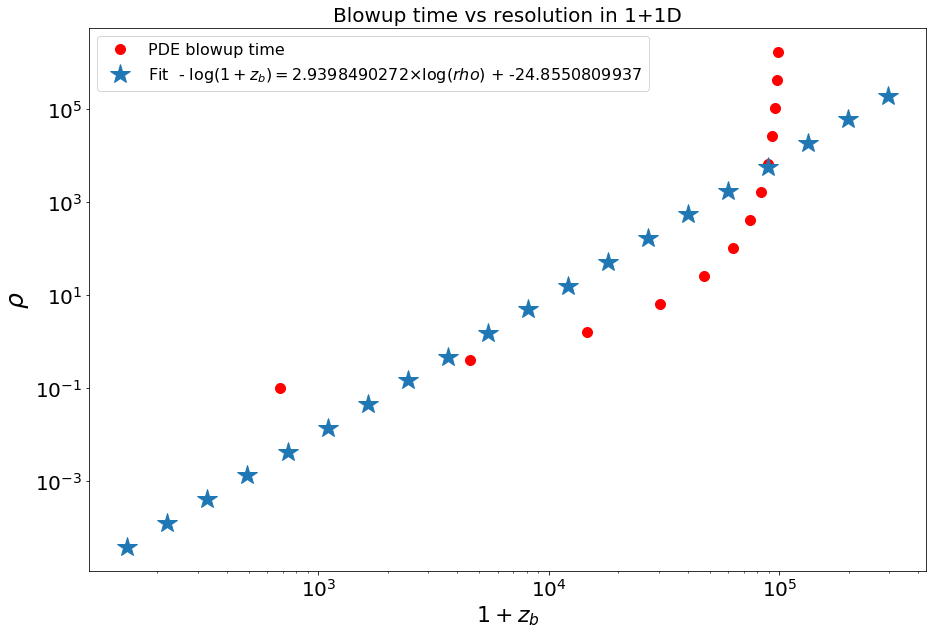

In [42]:
fig = plt.figure(figsize=(15,10))
plt.tick_params(labelsize=22)

# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt

# def model_peter(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt =4.0* a**2 ;
#     dzdt = [dadt,dvdt]
#     return dzdt

l=0

for dx_num in range(1,num,1):
    # initial condition
    point = np.argmin(phism)

    numerator=0
    dx = data[dx_num]['dx']
    k0 = data['Laplace_phi_ini'][dx_num][point]#  curvature
    z0 = [0.000000,k0/2.]
    # time points
        # time points
#     blowup_time =data['taub_theory'][dx_num]
#     t = np.linspace(0,blowup_time,100)
    # t2 = np.linspace(0,0.6)
#     z_peter = odeint(model_peter,z0,t)

# plt.axvline(x= 76.0202,linewidth=4,label=r"$\tau_b = 76.0202$" )
#     print("ODE: ",t[np.argmax(z_peter[:,0])])
    print("PDE: ",data['a_b']['dx = '+str(dx)])
#     print("Theory: ",data['taub_theory']['dx = '+str(dx)])

    if (l==0):
        plt.plot(1+data['z_b'][dx_num], data['Laplace_phi_ini'][dx_num][point],"r.",markersize=20,label="PDE blowup time")
#         plt.plot(dx,  data['taub_theory'][dx_num] ,"k*",markersize=20, label="Theory formula")
#         plt.plot(dx,  t[np.argwhere(z_peter[1:,0]/z_peter[:-1,0]>1.e4)[1]] ,"b.",markersize=20, label="ODE solution")

    else:
        plt.plot(1+data['z_b'][dx_num], data['Laplace_phi_ini'][dx_num][point],"r.",markersize=20)
#         plt.plot(dx,  data['taub_theory'][dx_num] ,"k*",markersize=20)
#         plt.plot(dx,  t[np.argwhere(z_peter[1:,0]/z_peter[:-1,0]>1.e4)[1]] ,"b.",markersize=20)
        

    l=l+1
# plt.savefig('curvature_evolution_cs1.pdf')

x_data = np.arange(5,13,0.4)

plt.plot(np.exp(x_data), np.exp(x_data *best_vals[0] +best_vals[1]),"*",markersize=20, label = r"Fit  - $\log(1+z_b) = $"+ str(best_vals[0]) +r"$\times \log(rho)$"+" + "+str(best_vals[1]))

plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=20)
# plt.xlim(0,0.5)
# plt.ylim(0,100)
plt.title("Blowup time vs resolution in 1+1D", fontsize=20)
plt.ylabel(r"$\rho$",fontsize=25)
plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
plt.xlabel("$1+z_b$",fontsize=22)
plt.legend(fontsize=16)


# Initial curvature vs Blowup time

In [44]:
from scipy.optimize import curve_fit
fit_data = np.zeros((9,2));
point = np.argmin(phism)
for dx_num in range(1,10,1):
    dx = data[dx_num]['dx'];
    k0 = data['Laplace_phi_ini'][dx_num][point]#  curvature
    blowup_time =data['z_b'][dx_num]+1.
    fit_data[dx_num-1,0] = k0
    fit_data[dx_num-1,1] = blowup_time
    
def func (x, alpha, beta):
    return x * alpha + beta

init =[-1,-1];

x_data = np.log(fit_data[:,0]);
y_data = np.log(fit_data[:,1]);

best_vals, covar = curve_fit(func, x_data, y_data, p0=init )
print(best_vals)

[ 0.38718124  8.81334314]


('PDE: ', defaultdict(<function <lambda> at 0x7fc3a12567d0>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a1256aa0>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a1256b18>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a1256c08>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a1256c80>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a1256e60>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a1256ed8>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a1256d70>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc398d370c8>, {}))


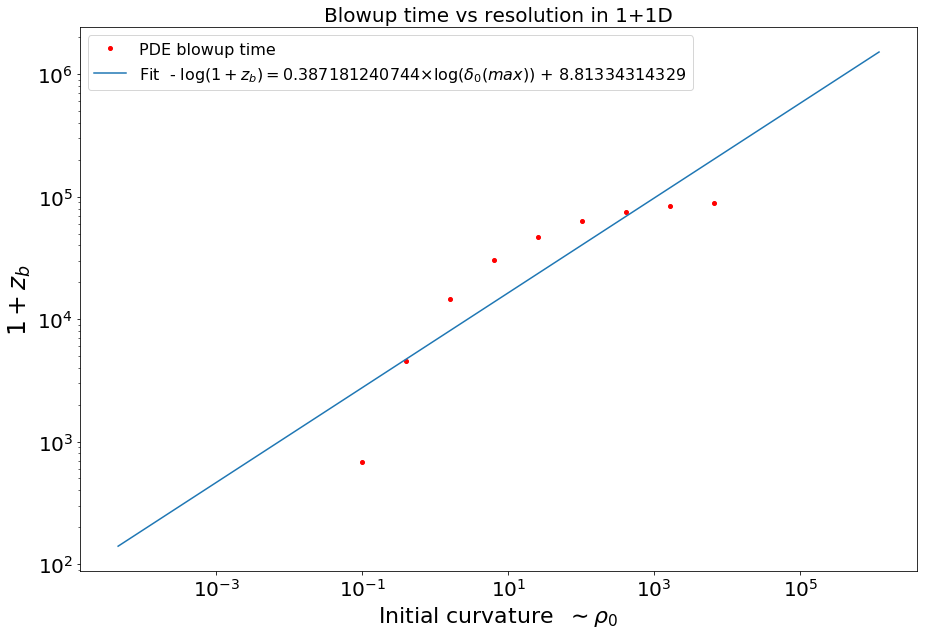

In [45]:
fig = plt.figure(figsize=(15,10))
plt.tick_params(labelsize=22)

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt

l=0

for dx_num in range(1,10,1):
    # initial condition
    point = np.argmin(phism)

    numerator=0
    dx = data[dx_num]['dx']
    k0 = data['Laplace_phi_ini'][dx_num][point]#  curvature
    z0 = [0.000000,k0/2.]
        # time points
    blowup_time =data['z_b'][dx_num]
    t = np.linspace(0,blowup_time,100)
    # t2 = np.linspace(0,0.6)
    z_peter = odeint(model_peter,z0,t)

# plt.axvline(x= 76.0202,linewidth=4,label=r"$\tau_b = 76.0202$" )
#     print("ODE: ",t[np.argmax(z_peter[:,0])])
    print("PDE: ",data['z_b']['dx = '+str(dx)])
#     print("Theory: ",data['taub_theory'][dx_num])
# 
    if (l==0):
        plt.plot(k0, 1 + data['z_b'][dx_num],"r.",markersize=8,label="PDE blowup time")
#         plt.plot(k0,  data['taub_theory'][dx_num] ,"k*",markersize=8, label="Theory formula")
#         plt.plot(k0,  t[np.argwhere(z_peter[1:,0]/z_peter[:-1,0]>1.e5)[1]] ,"bs",markersize=8, label="ODE solution")

    else:
        plt.plot(k0, 1 + data['z_b'][dx_num],"r.",markersize=8)
#         plt.plot(k0,  data['taub_theory'][dx_num] ,"k*",markersize=8)
#         plt.plot(k0,  t[np.argwhere(z_peter[1:,0]/z_peter[:-1,0]>1.e5)[1]] ,"bs",markersize=8)
        

    l=l+1
    
x_r = np.arange(-10,15)

plt.plot(np.exp(x_r), np.exp(x_r *best_vals[0] + best_vals[1]),"-",markersize=20, label = r"Fit  - $\log(1+z_b) = $"+ str(best_vals[0]) +r"$\times \log(\delta_0(max))$"+" + "+str(best_vals[1]))

plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=20)
# plt.xlim(0,0.5)
# plt.ylim(0,100)
plt.title("Blowup time vs resolution in 1+1D", fontsize=20)
plt.ylabel(r"$1+z_b$",fontsize=25)
plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
plt.xlabel(r"Initial curvature  $\sim \rho_0$",fontsize=22)
plt.legend(fontsize=16)
# plt.savefig('curvature_evolution_cs1.pdf')

# 1+z_b vs N_grid

In [ ]:
from collections import defaultdict

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
t_b = nested_dict(5, list)
data = nested_dict(5, list)


In [105]:

###########################
##### Initial conditions:##
###########################
w = -0.9;
cs2 = 0.;
z_ini = 800.;
N_ini = np.log(1./(1. + z_ini)); # N = log (a) so N = 
count_print =2
z_end = 0.;
N_end = np.log(1./(1. + z_end))
H0=0.0691023
Omega_m = 3./10.
w = -0.9;
###########################
##### Functions ##
###########################
def H2(H0, Omega_m, w , N_par):
    return H0**2 * (Omega_m * np.exp(-N_par) + (1. - Omega_m) * np.exp(-(1. + 3.*w) * N_par));


###########################
##### simulation 1+1 D##
###########################
courant_factor = 5.95e2

number_n = 8
for loop_num in range(0,number_n,1):
    dx_num = 1;
    
    n_grid = 2**4 * 2**loop_num
    phism=np.zeros(n_grid)
    for i in range( n_grid ):
        phism[i]=1.e-9*np.cos(np.pi*2.0*i/n_grid) # taking phi initially as cosine function for half od the data

    # Initial condition
    print(loop_num)
    pi   = np.zeros(n_grid)
    pi_prime = np.zeros(n_grid)
    #IC
    # del cs2;
    # pi_prime  = phism This is indeed the IC but the PDE itself assign it.
    pi_prime = phism;
    ########################
    dx =10.e-5*np.pi/n_grid/(2.**dx_num);
    dN = courant_factor * dx;
    print("dN: ",dN)
    pi_prime_p  = np.roll(phism,1)
    pi_prime_2p  = np.roll(phism,2)
    pi_prime_m  = np.roll(phism,-1)
    pi_prime_2m  = np.roll(phism,-2)
    laplacepi_prime_ini =  ((-pi_prime_2p + 16*pi_prime_p -30.0*pi_prime + 16*pi_prime_m-pi_prime_2m)/(12.0*dx**2));
#     laplacepi_prime_ini = ((pi_prime_p+pi_prime_m-2.0*pi_prime)/dx**2);
    laplacepi = 1.;
    laplacepi_new =0.1
    numerator = 0;
    ratio = 1.;
    condition_number = 1.e20
    print_numerator=0
#     t_b = 2.02225* (1./(laplacepi_prime_ini[np.argmin(phism)]/2.))**(1./3.)
#     print("Expected t_b:", t_b)
    N_param =N_ini;
    while  (ratio< condition_number and N_param<N_end):
    ########################
        pi_p  = np.roll(pi,1)
        pi_2p  = np.roll(pi,2)
        pi_m = np.roll(pi,-1)
        pi_2m = np.roll(pi,-2)
        ######3##
        pi_prime_p  = np.roll(pi_prime,1)
        pi_prime_m  = np.roll(pi_prime,-1)
        pi_prime_2p  = np.roll(pi_prime,2)
        pi_prime_2m  = np.roll(pi_prime,-2)
        ######################
        # pi' = v_pi ---> pi (t+dt) = pi(t) + v_pi *dt
        # The second eq is v_pi (t+dt) = v_pi(t) + v_pi' * dt
        # v_pi' = c_s^2 nabla^2 pi + (grad pi) ^2
#         laplacepi = ((pi_p+pi_m-2.0*pi)/dx**2);
        laplacepi = ((-pi_2p + 16*pi_p -30.0*pi + 16*pi_m-pi_2m)/(12.0*dx**2));
        laplacepi_prime = ((-pi_prime_2p + 16*pi_prime_p -30.0*pi_prime + 16*pi_prime_m-pi_prime_2m)/(12.0*dx**2));     
        gradpi_squared = ((pi_p-pi_m)/(2.0*dx))**2;
        pi_prime_prime = cs2 * laplacepi  + 1./(H2(H0, Omega_m, w , N_param)) * gradpi_squared #+our_term  #NL_term4 #gradpi_squared + ((cs2 -1)/2.) * grad_gradpi_gradpi_squared #gradpi_squared#+ 10. * ((cs2 -1)/2.) * grad_gradpi_gradpi_squared;# zeta' is pi_v'
        pi_old = pi;
        pi_prime = pi_prime + dN*(pi_prime_prime); # pi_v
        pi  = pi+dN*(pi_prime) # pi
        ###########################
        pi_p  = np.roll(pi,1)
        pi_2p  = np.roll(pi,2)
        pi_m = np.roll(pi,-1)
        pi_2m = np.roll(pi,-2)
        
        if (N_param == N_ini):
            ratio = 1;
        else:
            ratio = pi[np.argmin(phism)]/pi_old[np.argmin(phism)];# condition tos top the loop
        if (print_numerator%count_print==0 or N_param == N_ini):
            data[loop_num]['z'][numerator] =  np.exp(-N_param)-1.;
            data[loop_num]['pi'][numerator] = pi
            data[loop_num]['pi_prime'][numerator] = pi_prime
            data[loop_num]['curvature'][numerator] = laplacepi
            data[loop_num]['pi_prime_curvature'][numerator] = laplacepi_prime

            numerator = numerator+1;
        data[loop_num]['dx'] = dx;
        data[loop_num]['Ngrids'] = n_grid;
        data['Laplace_phi_ini'][loop_num] = laplacepi_prime_ini;
        print_numerator=print_numerator+1;
        data[loop_num]['numerator'] = numerator;
        data['N_b'][loop_num] = N_param;
        data['z_b'][loop_num] = np.exp(-N_param)-1.;
        N_param = N_param + dN
    print("Number of data:",numerator)
    print('The run for condition:'+ str("{:.1e}".format(condition_number))+', Ngrid= '+ str(n_grid) +', dx= '+str(dx)+' , dN= '+str(dN)+', Finished in N: '+str(N_param)+" ,which is z:"+str(np.exp(-N_param)-1.))



0
('dN: ', 0.005841398840268522)
('Number of data:', 187)
The run for condition:1.0e+20, Ngrid= 16, dx= 9.81747704247e-06 , dN= 0.00584139884027, Finished in N: -4.50701917965 ,which is z:89.6512004358
1
('dN: ', 0.002920699420134261)
('Number of data:', 332)
The run for condition:1.0e+20, Ngrid= 32, dx= 4.90873852123e-06 , dN= 0.00292069942013, Finished in N: -4.7465165321 ,which is z:114.18235085
2
('dN: ', 0.0014603497100671304)
('Number of data:', 617)
The run for condition:1.0e+20, Ngrid= 64, dx= 2.45436926062e-06 , dN= 0.00146034971007, Finished in N: -4.88524975456 ,which is z:131.323509607
3
('dN: ', 0.0007301748550335652)
('Number of data:', 1180)
The run for condition:1.0e+20, Ngrid= 128, dx= 1.22718463031e-06 , dN= 0.000730174855034, Finished in N: -4.96264828919 ,which is z:141.971925983
4
('dN: ', 0.0003650874275167826)
('Number of data:', 2300)
The run for condition:1.0e+20, Ngrid= 256, dx= 6.13592315154e-07 , dN= 0.000365087427517, Finished in N: -5.00645878049 ,which is

/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in square
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in add
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in subtract
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in add
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in subtract
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in subtract
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning:

In [106]:
from scipy.optimize import curve_fit

num = loop_num
fit_data = np.zeros((num,2));
for i in range(0,num,1):
    point =  np.int(data[i]['Ngrids']/2)
    dx = data[i]['dx'];
    Ngrids = data[i]['Ngrids']
    k0 = data['Laplace_phi_ini'][i][point]#  curvature
    blowup_z =data['z_b'][i]+1.
    
    fit_data[i,0] = Ngrids
    fit_data[i,1] =1 + blowup_z  
#     print(blowup_z,Ngrids)
def func (x, alpha, beta):
    return x * alpha + beta

init =[1,1];

x_data = np.log(fit_data[:,0]);
y_data = np.log(fit_data[:,1]);

best_vals, covar = curve_fit(func, x_data, y_data, p0=init )
print(best_vals)




[ 0.11649718  4.327439  ]


# 1+z_b as a function of Ngrid

('PDE: ', defaultdict(<function <lambda> at 0x7fc3ee9d0f50>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc2f4e8b398>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc2f4e8b500>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc2f4e8b5f0>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc2f4e8b6e0>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a12567d0>, {}))
('PDE: ', defaultdict(<function <lambda> at 0x7fc3a1256aa0>, {}))


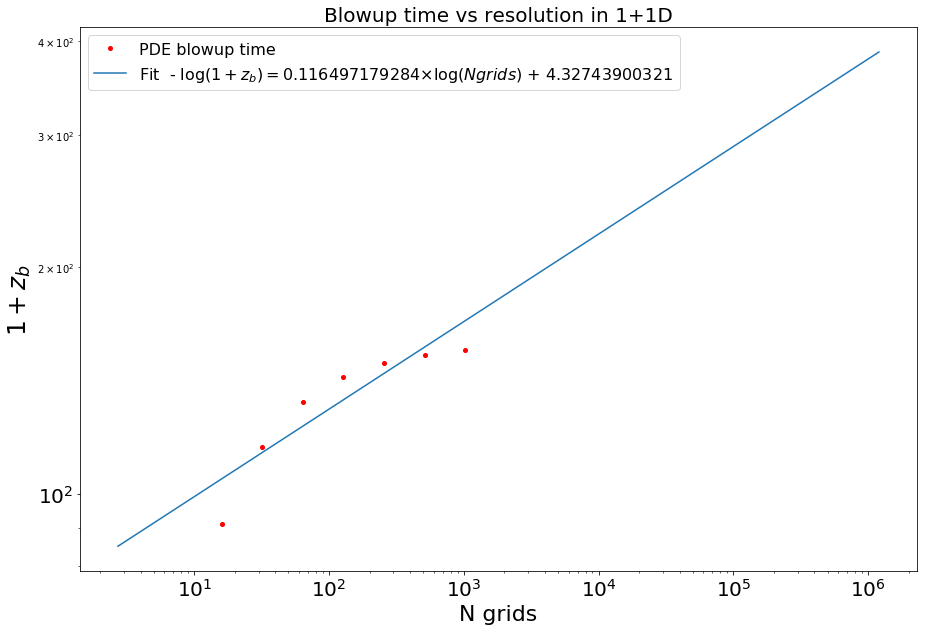

In [107]:
fig = plt.figure(figsize=(15,10))
plt.tick_params(labelsize=22)

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model_peter(z,t):
    a = z[0]
    v = z[1]
    dadt = v
    dvdt =4.0* a**2 ;
    dzdt = [dadt,dvdt]
    return dzdt

l=0

num = loop_num

for dx_num in range(0,num,1):
    # initial condition
    point = np.argmin(phism)

    numerator=0
    dx = data[dx_num]['dx']
#     k0 = data['Laplace_phi_ini'][dx_num][point]#  curvature
    Ngrids = data[dx_num]['Ngrids']
    z0 = [0.000000,k0/2.]
        # time points
    blowup_time =data['z_b'][dx_num]
    t = np.linspace(0,blowup_time,100)
    # t2 = np.linspace(0,0.6)
    z_peter = odeint(model_peter,z0,t)

# plt.axvline(x= 76.0202,linewidth=4,label=r"$\tau_b = 76.0202$" )
#     print("ODE: ",t[np.argmax(z_peter[:,0])])
    print("PDE: ",data['z_b']['dx = '+str(dx)])
#     print("Theory: ",data['taub_theory'][dx_num])
# 
    if (l==0):
        plt.plot(Ngrids, 1 + data['z_b'][dx_num],"r.",markersize=8,label="PDE blowup time")
#         plt.plot(k0,  data['taub_theory'][dx_num] ,"k*",markersize=8, label="Theory formula")
#         plt.plot(k0,  t[np.argwhere(z_peter[1:,0]/z_peter[:-1,0]>1.e5)[1]] ,"bs",markersize=8, label="ODE solution")

    else:
        plt.plot(Ngrids, 1 + data['z_b'][dx_num],"r.",markersize=8)
#         plt.plot(k0,  data['taub_theory'][dx_num] ,"k*",markersize=8)
#         plt.plot(k0,  t[np.argwhere(z_peter[1:,0]/z_peter[:-1,0]>1.e5)[1]] ,"bs",markersize=8)
        

    l=l+1
    
x_r = np.arange(1,15)

plt.plot(np.exp(x_r), np.exp(x_r *best_vals[0] + best_vals[1]),"-",markersize=20, label = r"Fit  - $\log(1+z_b) = $"+ str(best_vals[0]) +r"$\times \log(Ngrids)$"+" + "+str(best_vals[1]))

plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=20)
# plt.xlim(0,0.5)
# plt.ylim(0,100)
plt.title("Blowup time vs resolution in 1+1D", fontsize=20)
plt.ylabel(r"$1+z_b$",fontsize=25)
plt.legend(loc='best', bbox_to_anchor=(0.5, 10, 0.5, 0.5))
plt.xlabel(r"N grids",fontsize=22)
plt.legend(fontsize=16)
# plt.savefig('curvature_evolution_cs1.pdf')

# ODE solution

In [17]:
# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(13,10))
# plt.tick_params(labelsize=20)

# def model_full(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt = 4.0 * a**2 - 4 * a**3;
#     dzdt = [dadt,dvdt]
#     return dzdt
# def model_peter(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt =4.0* a**2 ;
#     dzdt = [dadt,dvdt]
#     return dzdt
# def model_higher(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt =  - 4 * a**3;
#     dzdt = [dadt,dvdt]
#     return dzdt

# def model_lin_higher(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt = 1*v*a;
#     dzdt = [dadt,dvdt]
#     return dzdt

# # initial condition
# z0 = [0.000001,3.7461536709378539e-05]

# # time points
# t = np.linspace(0,60)
# t2 = np.linspace(0,0.5)
# # solve ODE
# # z_full = odeint(model_full,z0,t)
# z_peter = odeint(model_peter,z0,t)
# # z_high = odeint(model_higher,z0,t)
# # test = odeint(model_lin_higher,z0,t)

# # plot results
# # plt.plot(t2,(test[:,0]),'b-',label=r'$\ddot{a} =-4 a^3$')
# plt.loglog(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')

# # plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# # plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =a^2-4 a^3$')
# plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# # plt.yscale('log')
# # plt.xlim(0.01,2.2)
# plt.ylabel('a(t)',fontsize=18)
# plt.title("x = x$_{min}$,  initial curvature $\equiv a'(0) =1$",fontsize=18)
# plt.xlabel('t',fontsize=18)
# plt.legend(loc='best',fontsize=18)
# plt.show()


In [18]:
# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(13,10))
# plt.tick_params(labelsize=20)

# def model_full(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt = 4.0 * a**2 - 4 * a**3;
#     dzdt = [dadt,dvdt]
#     return dzdt
# def model_peter(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt =4.0* a**2 ;
#     dzdt = [dadt,dvdt]
#     return dzdt
# def model_higher(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt =  - 4 * a**3;
#     dzdt = [dadt,dvdt]
#     return dzdt

# # initial condition
# z0 = [0,0.1]

# # time points
# t = np.linspace(0,4.3)
# t2 = np.linspace(0,4.3)
# # solve ODE
# z_full = odeint(model_full,z0,t)
# z_peter = odeint(model_peter,z0,t)
# z_high = odeint(model_higher,z0,t)

# # plot results
# plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
# plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
# plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# plt.yscale('log')
# # plt.xlim(0.01,2.2)
# plt.ylabel('a(t)',fontsize=18)
# plt.title("x = x$_{min}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
# plt.xlabel('t',fontsize=18)
# plt.legend(loc='best',fontsize=18)
# plt.show()


# ODE for the maxima

In [19]:
# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(13,10))
# plt.tick_params(labelsize=20)

# def model_full(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt = 4.0 * a**2 - 4 * a**3;
#     dzdt = [dadt,dvdt]
#     return dzdt
# def model_peter(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt =4.0* a**2 ;
#     dzdt = [dadt,dvdt]
#     return dzdt
# def model_higher(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt =  - 4 * a**3;
#     dzdt = [dadt,dvdt]
#     return dzdt

# # initial condition
# z0 = [0,-0.1]

# # time points
# t = np.linspace(0,8.3)
# t2 = np.linspace(0,8.3)
# # solve ODE
# z_full = odeint(model_full,z0,t)
# z_peter = odeint(model_peter,z0,t)
# z_high = odeint(model_higher,z0,t)

# # plot results
# plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
# plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
# # plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# # plt.yscale('log')$
# # plt.xlim(0.01,2.2)
# plt.ylabel('a(t)',fontsize=18)
# plt.title("x = x$_{max}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
# plt.xlabel('t',fontsize=18)
# plt.legend(loc='best',fontsize=18)
# plt.show()


In [20]:
# import numpy as np
# from scipy.integrate import odeint
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(13,10))
# plt.tick_params(labelsize=20)

# def model_full(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt = 4.0 * a**2 - 4 * a**3;
#     dzdt = [dadt,dvdt]
#     return dzdt
# def model_peter(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt =4.0* a**2 ;
#     dzdt = [dadt,dvdt]
#     return dzdt
# def model_higher(z,t):
#     a = z[0]
#     v = z[1]
#     dadt = v
#     dvdt =  - 4 * a**3;
#     dzdt = [dadt,dvdt]
#     return dzdt

# # initial condition
# z0 = [0,1]

# # time points
# t = np.linspace(0,3.8)
# t2 = np.linspace(0,2.3)
# # solve ODE
# z_full = odeint(model_full,z0,t)
# z_peter = odeint(model_peter,z0,t)
# z_high = odeint(model_higher,z0,t)

# # plot results
# # plt.plot(t,z_peter[:,0],'r--',label=r'$\ddot{a} = 4 a^2$')
# plt.plot(t2,z_high[:,0],'b-',label=r'$\ddot{a} =-4 a^3$')
# # plt.plot(t2,z_high[:,0],'g-',label=r'$\ddot{a} =4 a^2-4 a^3$')
# # plt.axvline(x= 2.8043 *(z0[1]**2 *3./8.)**(1./3.) /(np.abs(z0[1])),markersize=16,label="Theoretical blow-up time" )

# # plt.yscale('log')$
# # plt.xlim(0.01,2.2)
# plt.ylabel('a(t)',fontsize=18)
# plt.title("x = x$_{max}$,  initial curvature $\equiv a'(0) =$"+str(z0[1]),fontsize=18)
# plt.xlabel('t',fontsize=18)
# plt.legend(loc='best',fontsize=18)
# plt.show()


# Some tests on the FFT

In [21]:
# # Some tests for the Discrete FT: simple test which is easily calculatbale by hand according to X_k = Sigma_n=0^N-1 x_n exp(-2 pi i k n )
# test_data = [0,1]
# FT_test = np.fft.fft(test_data)
# # print("Discrete Fourier transform of:",test_data, " is : ",FT_test)
# # Computing the powerspectrum and frequencies:
# spec = np.abs(np.fft.fft(test_data))**2 # computing the spectrum which is absolute value of Forier transformation
# freqs = np.fft.fftfreq(len(FT_test)) # discrete frequencies associated to the length of the field
# print("Data: ",test_data)
# print(" discrete Fourier transform : ",FT_test)
# print(" Frequencies: ",freqs)
# print(" poswer spectrum:", spec,  )
# # Very simple example which could easily be checked by hand
# # Real space data
# #### For illustration
# # plt.figure(figsize=(8,6))
# # plt.plot(test_data[:],"o",markersize = 8)
# # plt.show()
# # # FFTW
# # plt.figure(figsize=(8,6))
# # plt.plot(freqs,FT_test,"o",markersize = 8)
# # plt.show()
# # # Powerspectrum
# # plt.figure(figsize=(8,6))
# # plt.plot(np.abs(freqs),spec,"o",markersize = 8)
# # plt.show()

# #############################
# ######## Sine, 1/x example ## 
# #############################

# test_data2  = np.sin(np.arange(1, 100, 1) * 2.0*np.pi/100) # Sampling data from a sine function
# # test_data2  = 1./(np.arange(1, 100, 1) * 2.0*np.pi/100) # Sampling data from a sine function

# FT_test2 = np.fft.fft(test_data2) # Computing FFTW
# # print("Discrete Fourier transform of:",test_data, " is : ",FT_test)
# # Computing the powerspectrum and frequencies:
# spec2 = np.abs(np.fft.fft(test_data2))**2 # computing the spectrum which is absolute value of Forier transformation
# freqs2 = np.fft.fftfreq(len(FT_test2)) # discrete frequencies associated to the length of the field
# # print("Data: ",test_data2)
# # print(" discrete Fourier transform : ",FT_test2)
# # print(" Frequencies: ",freqs2)
# # print(" poswer spectrum:", spec2,  )
# # Very simple example which could easily be checked by hand
# # Real space data
# plt.figure(figsize=(8,6))
# plt.plot(test_data2[:],".",markersize = 8)
# plt.show()
# # FFTW
# plt.figure(figsize=(8,6))
# plt.plot(freqs2,np.abs(FT_test2),".",markersize = 8)
# plt.show()
# # Powerspectrum
# plt.figure(figsize=(8,6))
# plt.plot(np.abs(freqs2),spec2,".",markersize = 8)
# plt.show()

